# 汽车配件行业销售数据分析及可视化 

## 一、前言

汽车配件和快消产品不同之处在于，顾客不是价格敏感性的群体，他们更加关注产品的性价比。大部分顾客选择购买原厂件，原厂件价格高，利润少，质量有保证。近年来，品牌件也成为了发展趋势，成本低，利润高，成为供应商主推的产品，质量良莠不齐，价格低廉可以销售更多的同时，也会导致更高的退货率。

## 二、提出问题：

   1. 四大区域的市场份额情况如何  
   2. 销售排名前十的省份有哪些  
   3. 不同省份成交哪些品类高  
   4. 华南区成交销售额排名前十的车品牌有哪些  
   5. 华南区不同车品牌的品牌件销售占比、原厂件销售占比分别是多少  

## 三、数据清洗

In [1]:
from pylab import mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from datetime import timedelta
from datetime import datetime


In [2]:
with open(r'data.csv')as f:
    transaction_data = pd.read_csv(f)



D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 建立函数，查看数据集前3行和各列的信息
def check_file(data, data_name):
    print('{:*^30}'.format('{}前3行').format(data_name))
    print(data.head(3))
    print('{:*^30}'.format('{}各列信息').format(data_name))
    print(data.info(), '\n', '\n')


check_file(transaction_data, 'transaction_data')



************transaction_data前3行*************
       支付月                 支付时间       订单号    订单明细id  汽修厂id（加密脱敏）  \
0  2019-06  2019-06-27 17:10:24  O4214957  12507649       666401   
1  2019-06  2019-06-29 15:07:33  O4224523  12533061       808137   
2  2019-06  2019-06-30 13:47:24  O4228701  12544491       750947   

                  汽修厂 注册省份 注册城市    大区  车品牌     车子品牌         配件编码       标准主名  \
0   鼎湖区中德美钣金喷漆汽车专项维修厂   广东  肇庆市  华南大区  雪佛兰  上汽通用雪佛兰      9017701   水箱导流板（下）   
1          永康市盛鑫汽车快修店   浙江  金华市  华东大区   大众     上汽大众   18D867175E    前门扶手（左）   
2  广州市车爵仕汽车美容装饰维修服务中心   广东  广州市  华南大区   本田     东风本田  33151SNAH02  前大灯半总成（左）   

        配件品牌 配件品质  商品销售数量  商品销售金额  供应商id（加密脱敏）              供应商 商品大类  
0  申通_SRUMTO   国内       1    35.0       711761        广州市昊翔汽车配件  事故件  
1        NaN   国内       1    65.0       785054  纯配供应链科技(杭州）有限公司  事故件  
2         俊誉   国内       1   318.0       743836          途畅（品牌件）  事故件  
************transaction_data各列信息************
<class 'pandas.core.frame.DataFrame'

In [4]:
# 查看字段唯一值数量

def check_unique(data):
    for column in data.columns:
        print('{} 唯一值数量:'.format(column), len(data[column].unique()))


check_unique(transaction_data)


支付月 唯一值数量: 5
支付时间 唯一值数量: 318695
订单号 唯一值数量: 335199
订单明细id 唯一值数量: 929939
汽修厂id（加密脱敏） 唯一值数量: 16014
汽修厂 唯一值数量: 17073
注册省份 唯一值数量: 23
注册城市 唯一值数量: 182
大区 唯一值数量: 9
车品牌 唯一值数量: 79
车子品牌 唯一值数量: 123
配件编码 唯一值数量: 195635
标准主名 唯一值数量: 21547
配件品牌 唯一值数量: 593
配件品质 唯一值数量: 4
商品销售数量 唯一值数量: 47
商品销售金额 唯一值数量: 7317
供应商id（加密脱敏） 唯一值数量: 569
供应商 唯一值数量: 573
商品大类 唯一值数量: 5


In [5]:
# 检查数据集空值情况


def check_none(data):
    print('{:*^30}'.format('有空值的列'))
    print(data.isnull().any(axis=0))
    print('{:*^30}'.format('有空值的行数量'))
    print(data.isnull().any(axis=1).sum())


check_none(transaction_data)


************有空值的列*************
支付月            False
支付时间           False
订单号            False
订单明细id         False
汽修厂id（加密脱敏）    False
汽修厂             True
注册省份            True
注册城市            True
大区             False
车品牌             True
车子品牌            True
配件编码           False
标准主名            True
配件品牌            True
配件品质           False
商品销售数量         False
商品销售金额         False
供应商id（加密脱敏）    False
供应商            False
商品大类            True
dtype: bool
***********有空值的行数量************
610055


In [6]:
## 转换时间格式为datetime
transaction_data['支付时间'] = transaction_data['支付时间'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

## 检查是否转换成功
transaction_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929944 entries, 0 to 929943
Data columns (total 20 columns):
支付月            929944 non-null object
支付时间           929944 non-null datetime64[ns]
订单号            929944 non-null object
订单明细id         929944 non-null int64
汽修厂id（加密脱敏）    929944 non-null int64
汽修厂            929942 non-null object
注册省份           929942 non-null object
注册城市           929942 non-null object
大区             929944 non-null object
车品牌            920502 non-null object
车子品牌           910455 non-null object
配件编码           929944 non-null object
标准主名           929936 non-null object
配件品牌           810578 non-null object
配件品质           929944 non-null object
商品销售数量         929944 non-null int64
商品销售金额         929944 non-null float64
供应商id（加密脱敏）    929944 non-null int64
供应商            929944 non-null object
商品大类           372976 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(14)
memory usage: 141.9+ MB


In [7]:
# 对大区进行数据清洗
region = transaction_data['大区']
## 每个值出现次数
region.value_counts()
## 将华南一区和华南二区替换为华南大区
region.replace('华南一区', '华南大区', inplace=True)
region.replace('华南二区', '华南大区', inplace=True)
region.value_counts()


华南大区    805238
华东大区     72311
华北大区     27110
华中大区     24970
其它         245
无挂靠         68
虚拟大区         2
Name: 大区, dtype: int64

In [8]:
# 删掉“无挂靠”，“其它”，“虚拟大区”的所有数据

def CleanData(name):
    transaction_data.drop(index=(transaction_data.loc[(
        transaction_data['大区'] == name)].index), inplace=True)

CleanData('无挂靠')
CleanData('其它')
CleanData('虚拟大区')

# 检查是否成功删掉其它大区
transaction_data['大区'].unique()


array(['华南大区', '华东大区', '华北大区', '华中大区'], dtype=object)

In [9]:
with open(r'品类表.csv')as f:
    category_data = pd.read_csv(f)


In [10]:
# 新建一个dataframe，取出需要的列
data1 = transaction_data[['支付月', '支付时间', '大区', '注册省份', '注册城市',
                          '汽修厂id（加密脱敏）', '订单号', '车品牌', '配件品牌', '配件品质', '标准主名', '商品销售数量', '商品销售金额']]
data1 = pd.merge(data1, category_data, how='left')  # 合并了品类表中的“大类 ”
data1['大类'].fillna('其它', inplace=True)
data1['大类'].value_counts()


车身及附件     368634
底盘件       189307
发动机件      188091
电气设备      148074
其它         42523
照明及电器件        57
Name: 大类, dtype: int64

In [11]:
# 修改data1的列名
data1.rename(columns={'注册省份': '省份', '注册城市': '城市',
                      '汽修厂id（加密脱敏）': '客户id', '大类': '商品品类'}, inplace=True)


In [12]:
# 去掉缺失值
data1.dropna(axis=0, how='any', inplace=True)
check_file(data1, 'data1')


************data1前3行*************
       支付月                支付时间    大区  省份   城市    客户id       订单号  车品牌  \
0  2019-06 2019-06-27 17:10:24  华南大区  广东  肇庆市  666401  O4214957  雪佛兰   
2  2019-06 2019-06-30 13:47:24  华南大区  广东  广州市  750947  O4228701   本田   
3  2019-06 2019-06-26 13:34:29  华东大区  浙江  台州市  814324  O4206801   大众   

        配件品牌 配件品质       标准主名  商品销售数量  商品销售金额   商品品类  
0  申通_SRUMTO   国内   水箱导流板（下）       1    35.0   发动机件  
2         俊誉   国内  前大灯半总成（左）       1   318.0   电气设备  
3         尚配   国内       水箱框架       1   199.0  车身及附件  
************data1各列信息************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 807206 entries, 0 to 936685
Data columns (total 14 columns):
支付月       807206 non-null object
支付时间      807206 non-null datetime64[ns]
大区        807206 non-null object
省份        807206 non-null object
城市        807206 non-null object
客户id      807206 non-null int64
订单号       807206 non-null object
车品牌       807206 non-null object
配件品牌      807206 non-null object
配件品质      80

In [13]:
# 删掉商品品类中的‘其它’和‘照明及电器件’
data1.drop(index=(data1.loc[(data1['商品品类'] == '其它')].index), inplace=True)
data1.drop(index=(data1.loc[(data1['商品品类'] == '照明及电器件')].index), inplace=True)
data1['商品品类'].unique()


array(['发动机件', '电气设备', '车身及附件', '底盘件'], dtype=object)

In [14]:
#图表中文标签显示
mpl.rcParams['font.sans-serif'] = ['SimHei']


## 四、分析问题

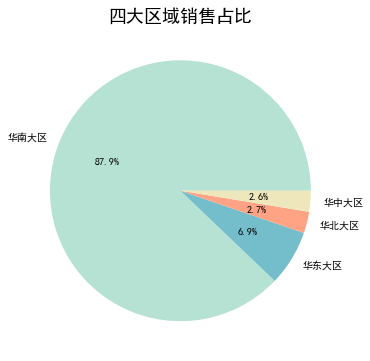

In [40]:
# 四大区域的总体销售占比
sales_region = data1.groupby('大区')['订单号'].count().sort_values(ascending=False)
names = [u'华南大区', u'华东大区', u'华北大区', u'华中大区']
colors = ['#B6E2D3', '#74BDCB', '#FFA384', '#EFE7BC']
plt.figure(figsize=(12, 6))
plt.pie(sales_region, labels=names, colors=colors, autopct='%.1f%%')
plt.title(u'四大区域销售占比', fontsize=18)
plt.show()


华南大区的销售量占总体销售量的88%，说明该公司的主要市场在华南，华东作为后期主要拓展的方向。

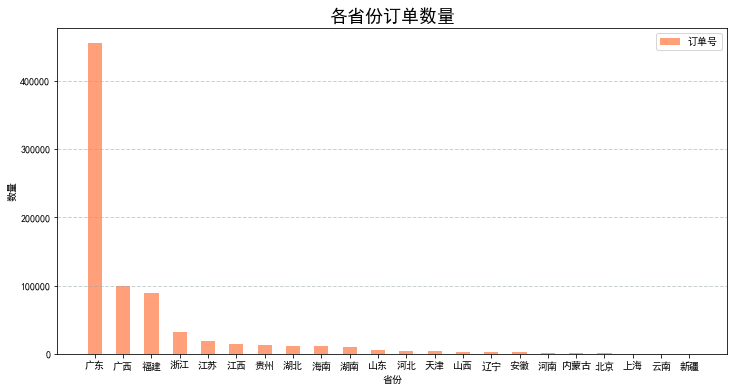

In [16]:
# 各省订单数量
province = data1.groupby('省份')['订单号'].count().sort_values(ascending=False)
index = np.arange(22)
plt.figure(figsize=(12, 6))
plt.bar(index, province.values, 0.5, color='#FFA07A', label=u'订单数')
plt.xticks(index, [u'广东', u'广西', u'福建', u'浙江', u'江苏', u'江西', u'贵州', u'湖北', u'海南', u'湖南',
                   u'山东', u'河北', u'天津', u'山西', u'辽宁', u'安徽', u'河南', u'内蒙古', u'北京', u'上海', u'云南', u'新疆'])
plt.xlabel(u'省份')
plt.ylabel(u'数量')
plt.legend([u'订单号', ], loc='upper right')  # 元组加逗号 使图例显示完整
plt.title(u'各省份订单数量', fontsize=18)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.show()


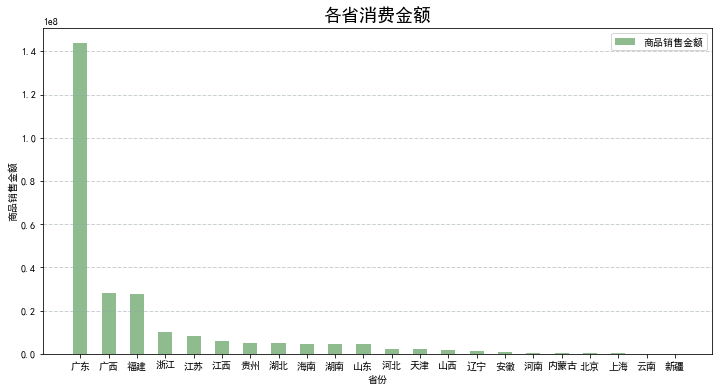

In [17]:
# 各省消费金额
sales_province = data1.groupby(
    '省份')['商品销售金额'].sum().sort_values(ascending=False)
index = np.arange(22)
plt.figure(figsize=(12, 6))
plt.bar(index, sales_province.values, 0.5, color='#8fbc8f', label=u'订单数')
plt.xticks(index, [u'广东', u'广西', u'福建', u'浙江', u'江苏', u'江西', u'贵州', u'湖北', u'海南', u'湖南',
                   u'山东', u'河北', u'天津', u'山西', u'辽宁', u'安徽', u'河南', u'内蒙古', u'北京', u'上海', u'云南', u'新疆'])
plt.xlabel(u'省份')  # plt.xlabel('时间',fontproperties = 'SimHei',fontsize = 20)
plt.ylabel(u'商品销售金额')
plt.legend([u'商品销售金额', ], loc='upper right')  # 元组加逗号 使图例显示完整
plt.title(u'各省消费金额', fontsize=18)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.show()


广东、广西、福建的订单量较大，两广地区超过10万单，福建接近10万；因此消费金额也只有这三个省份达到了2000万元以上。

In [18]:
# 各省份消费用户数量
sales_province_num = data1.groupby(
    '省份')['客户id'].count().sort_values(ascending=False)
sales_province_num


省份
广东     455325
广西      98683
福建      88944
浙江      31676
江苏      18991
江西      14868
贵州      13292
海南      11401
湖北      11146
湖南       9627
山东       5091
河北       4414
天津       4276
山西       2727
辽宁       2505
安徽       2243
河南       1124
内蒙古      1103
北京        566
上海         46
云南         45
新疆          1
Name: 客户id, dtype: int64

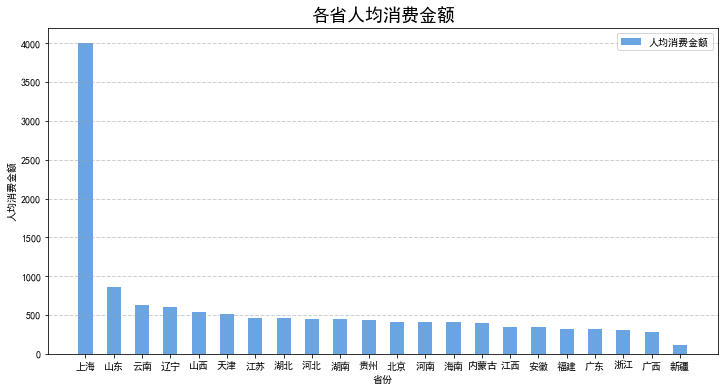

In [19]:
sales_province_avg = (data1.groupby('省份')['商品销售金额'].sum(
)/data1.groupby('省份')['客户id'].count()).sort_values(ascending=False)
index = np.arange(22)
plt.figure(figsize=(12, 6))
plt.bar(index, sales_province_avg.values, 0.5, color='#6aa5e1', label=u'人均消费')
plt.xticks(index, [u'上海', u'山东', u'云南', u'辽宁', u'山西', u'天津', u'江苏', u'湖北', u'河北', u'湖南',
                   u'贵州', u'北京', u'河南', u'海南', u'内蒙古', u'江西', u'安徽', u'福建', u'广东', u'浙江', u'广西', u'新疆'])
plt.xlabel(u'省份')  # plt.xlabel('时间',fontproperties = 'SimHei',fontsize = 20)
plt.ylabel(u'人均消费金额')
plt.legend([u'人均消费金额', ], loc='upper right')  # 元组加逗号 使图例显示完整
plt.title(u'各省人均消费金额', fontsize=18)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.show()


上海的人均消费金额排名第一，达到了4000元，说明上海的人均消费水平较高，购买的配件金额较高，但消费人数仅有46人。

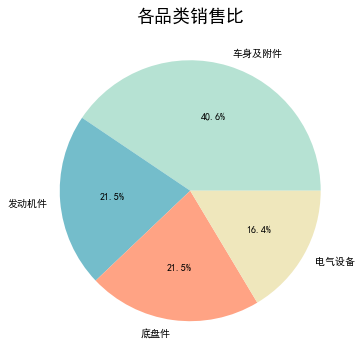

In [47]:
# 消费品类
sales_category_num = data1.groupby(
    '商品品类')['订单号'].count().sort_values(ascending=False)
category_names = [u'车身及附件', u'发动机件', u'底盘件', u'电气设备']
colors = ['#B6E2D3', '#74BDCB', '#FFA384', '#EFE7BC']
plt.figure(figsize=(12, 6))
plt.pie(sales_category_num, labels=category_names,
        colors=colors, autopct='%1.1f%%')
plt.title(u'各品类销售比', fontsize=18)
plt.show()


以上可知，车身及附件的销量是最多的，但是产品贡献度往往需要考虑销售额，所以我们需要进一步对各个产品的销售额做帕累托分析。

In [48]:
# 对各个品类的销售额做帕累托分析
sales_category = data1.groupby('商品品类')['商品销售金额'].sum(
).sort_values(ascending=False).reset_index()
sales_category.loc[4] = ['', 0]

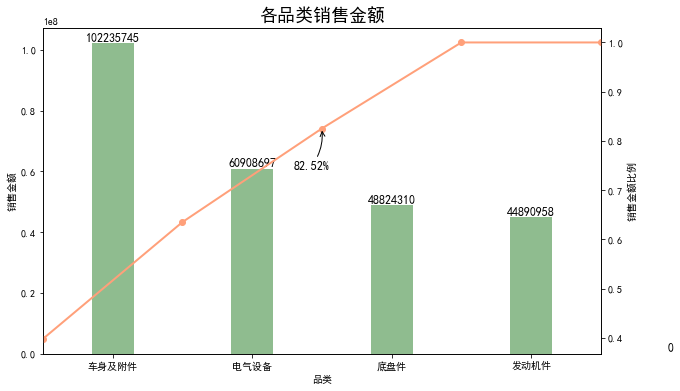

In [22]:
index = np.arange(len(sales_category))
x_category = np.array(list(sales_category['商品品类']))
y_sale = np.array(list(sales_category['商品销售金额']))
plt.figure(figsize=(10, 6))
plt.bar(index+0.5, y_sale, width=0.3, color='darkseagreen')
plt.xticks(index+0.5, sales_category['商品品类'])
plt.xlabel('品类')
plt.ylabel('销售金额')
plt.title('各品类销售金额', fontsize=18)
for a, b in zip(index, y_sale):
    plt.text(a+0.5, b+0.05, '%.0f' % b, ha='center',
             va='bottom', fontsize=12)  # 添加数据标签
p1 = 1.0*y_sale.cumsum()/y_sale.sum()
p2 = pd.Series(p1)
p2.plot(color='#FFA07A', secondary_y=True, style='-o', linewidth=2)
plt.ylabel(u'销售金额比例')
plt.annotate(format(p2[2], '.2%'), xy=(2, p2[2]), xytext=(
    2*0.9, p2[2]*0.9), arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"), fontsize=12)  # annotate（注解）
plt.show()



结果显示车身及附件，电气设备，底盘件三种产品的总销售额就达到了所有品类产品销售总额的82.5%。  
知道了各品类的产品对销售额的贡献度，我们还可以再进一步分析，各省份的不同品类产品的销售情况，分析一下每个省份的客户购买品类是否有偏好。

In [23]:
# 各省份的不同品类产品的订购情况
province_category = pd.pivot_table(data1, index=['省份'], values=['商品销售金额'], columns=[
                                   '商品品类'], aggfunc=[np.sum], fill_value=0)
ind1 = province_category['sum']['商品销售金额'].index
province_category_va = province_category['sum']['商品销售金额'].values
frame1 = pd.DataFrame(province_category_va, index=['上海', '云南', '内蒙古', '北京', '天津', '安徽', '山东', '山西', '广东', '广西',
                                                   '新疆', '江苏', '江西', '河北', '河南', '浙江', '海南', '湖北', '湖南', '福建', '贵州', '辽宁'], columns=['发动机件', '底盘件', '电气设备', '车身及附件'])
cm = sns.light_palette('red', as_cmap=True)
s = frame1.style.background_gradient(cmap=cm)
s


,发动机件,底盘件,电气设备,车身及附件
上海,2961,65388,44991,70745
云南,4883,1598,7642,13149
内蒙古,79519,69358,81660,200961
北京,49703,25799,55975,99816
天津,436455,371727,591686,913782
安徽,157447,127773,173724,319974
山东,712126,677689,1.24842e+06,1.77366e+06
山西,142365,165292,277464,813125
广东,2.32343e+07,2.66909e+07,3.46609e+07,5.91916e+07
广西,4.79616e+06,5.585e+06,6.39742e+06,1.07026e+07


大部分省份的客户购买车身及附件较多，因为车身及附件大多是属于事故件，即发生事故时更容易损坏车的车身部位。  
江苏省的客户购买发动机件的仅次于购买车身及附件。

In [24]:
# 华南区销售额排名前十车品牌
sales_car_HN = data1.where(data1['大区'] == '华南大区').groupby(
    '车品牌')['商品销售金额'].sum().sort_values(ascending=False)
sales_car_HN_1 = sales_car_HN.to_frame()  # 转为dataframe
sales_car_HN_1.reset_index(inplace=True)
sales_car_HN_1['商品销售金额'] = round(sales_car_HN_1['商品销售金额'], 0)  # 取整
sales_car_HN_top10 = sales_car_HN_1[:10]
sales_car_HN_top10


,车品牌,商品销售金额
0,丰田,29988059.0
1,本田,23810799.0
2,宝马,22059178.0
3,日产,19352369.0
4,大众,15755130.0
5,奔驰,12731084.0
6,奥迪,10487042.0
7,福特,7735894.0
8,路虎,7139196.0
9,别克,7085615.0


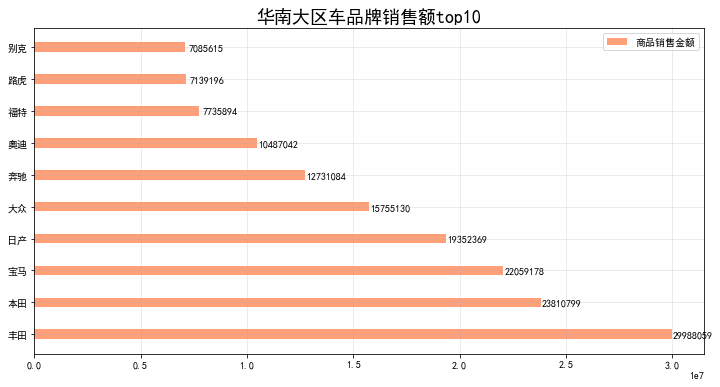

In [25]:
a = list(sales_car_HN_top10['车品牌'])
b = list(sales_car_HN_top10['商品销售金额'])
plt.figure(figsize=(12, 6))
# 绘制条形图
plt.barh(range(len(a)), b, height=0.3, color='#FFA07A')
# 对应x轴与字符串
plt.yticks(range(len(a)), a, rotation=0)
# 添加具体数值
for y, x in enumerate(b):
    plt.text(x+1000000, y-0.3/2, '%.0f' % x, ha='center', va='bottom')
# 添加网格
plt.grid(alpha=0.3)
# 添加图示
plt.legend(['商品销售金额', ], loc='upper right')
# 添加标题
plt.title('华南大区车品牌销售额top10', loc='center', fontsize='18')
plt.show()


In [26]:
# 华南区不同车品牌的品牌件销售占比、原厂件销售占比分别是多少
data2 = data1.where(data1['大区'] == '华南大区')
data2.dropna(axis=0, how='any', inplace=True)


In [27]:


def FilterData(fn, name):
    yc_sale = data2.where(fn).groupby('车品牌')[name].sum(
    ).sort_values(ascending=False).reset_index()
    return yc_sale


yc_sale = FilterData(data2['配件品质'] == '原厂', '商品销售金额')
pp_sale = FilterData(data2['配件品质'] != '原厂', '商品销售金额')
yc_num = FilterData(data2['配件品质'] == '原厂', '商品销售数量')
pp_num = FilterData(data2['配件品质'] != '原厂', '商品销售数量')


In [28]:
data3 = pd.merge(sales_car_HN_1, yc_sale, how='left', on='车品牌')
data4 = pd.merge(data3, pp_sale, how='left', on='车品牌')
data4.columns = ['车品牌', '商品销售金额', '原厂件销售金额', '品牌件销售金额']


In [29]:
data4['品牌件销售金额'] = round(data4['品牌件销售金额'], 0)  # 取整
data4.fillna(0, inplace=True)  # 用0替代空值


In [30]:
data4['原厂件销售额占比'] = (data4['原厂件销售金额']/data4['商品销售金额']
                     ).apply(lambda x: format(x, '.2%'))
data4['品牌件销售额占比'] = (data4['品牌件销售金额']/data4['商品销售金额']
                     ).apply(lambda x: format(x, '.2%'))


In [31]:
data5 = data2.groupby('车品牌')['商品销售数量'].sum(
).sort_values(ascending=False).reset_index()
data6 = pd.merge(data5, yc_num, how='left', on='车品牌')
data6 = pd.merge(data6, pp_num, how='left', on='车品牌')
data6.columns = ['车品牌', '商品销售数量', '原厂件销售数量', '品牌件销售数量']
data6.fillna(0, inplace=True)  # 用0替代空值


In [32]:
data6['原厂件销售量占比'] = data6['原厂件销售数量']/data6['商品销售数量']
data6['品牌件销售量占比'] = data6['品牌件销售数量']/data6['商品销售数量']
data6['原厂件销售量占比'] = round(data6['原厂件销售量占比'], 2)  # 2位小数
data6['品牌件销售量占比'] = round(data6['品牌件销售量占比'], 2)  # 2位小数


In [33]:
# 用销量占比来画图
data6_top10 = data6[:10]
data6_top10 = data6_top10.sort_values(by=['原厂件销售量占比'], ascending=False)
data6_top10.reset_index(drop=True, inplace=True)


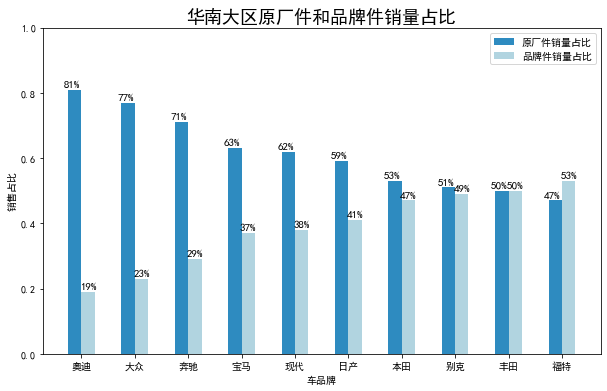

In [34]:
index = np.arange(len(data6_top10))
x_yc = np.array(list(data6_top10['原厂件销售量占比']))
x_pp = np.array(list(data6_top10['品牌件销售量占比']))
# 设定画布大小
plt.figure(figsize=(10, 6))
# 建立簇状柱形图
plt.bar(index, data6_top10['原厂件销售量占比'], color='#2E8BC0', width=0.25)
plt.bar(index+0.25, data6_top10['品牌件销售量占比'], color='#B1D4E0', width=0.25)
plt.xticks(index+0.125, data6_top10['车品牌'])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel('车品牌')
plt.ylabel('销售占比')
# 添加数据标签
for a, b in zip(index, x_yc):
    plt.text(a-0.05, b+0.005, '%.0f%%' %
             (b*100), ha='center', va='bottom', fontsize=11)
for a, b in zip(index, x_pp):
    plt.text(a+0.25, b+0.005, '%.0f%%' %
             (b*100), ha='center', va='bottom', fontsize=11)
# 添加标题
plt.title('华南大区原厂件和品牌件销量占比', fontsize=18)
# 添加图例
plt.legend(['原厂件销量占比', '品牌件销量占比'], loc='upper right')
plt.show()


从图中可以发现，奥迪、大众（进口）、奔驰、宝马、现代的原厂件销量占比达到60%以上。  
一方面说明客户对于豪华车，普遍会使用原厂件，以保证产品与原来的一样，另一方面说明，品牌件还没有得到客户信赖和认可。  
而日产、本田、别克、丰田、福特，品牌件占比已经达到40%以上，甚至超过原厂件销量，说明品牌件从质量和价格越来越得到客户认可。

## 五、结论

#### 通过对销售记录的分析，得出以下几个结论：

   1. 华南区域作为该公司的主要市场，要继续巩固华南市场的地位。  
   2. 在华南区域其它销量不高的省份进行市场调研，寻找不愿在平台消费的原因，分析原因并改善。  
   3. 大部分成交的品类为车身及附件，成交量占40.6%，发动机件和底盘件各占21.5%，因此可以从车身及附件做推广促销，吸引客户购买。  
   4. 品牌件的发展是大势所趋，产品质量有保证且价格比原厂件更具优势，尤其是风本日等保有量高的车品牌，可以更多推广品牌件。